<a href="https://colab.research.google.com/github/mleyvaz/vision-computadoras/blob/main/Transformada_de_Hough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librerias 
import numpy as np
import pandas as pd
import cv2  
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

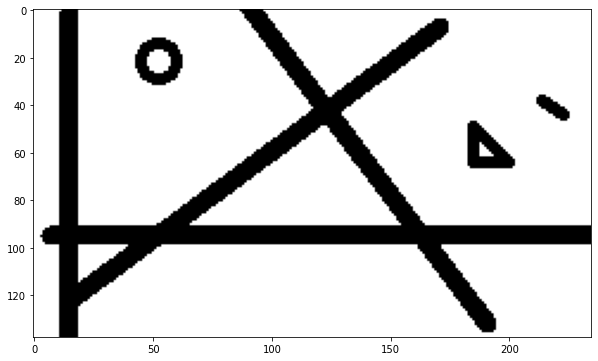

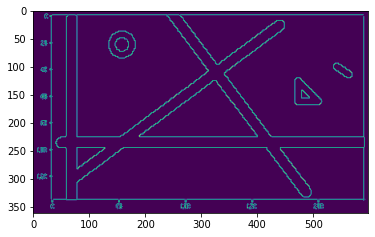

In [2]:
# Deteccion de bordes
import cv2
import numpy as np
from matplotlib import pyplot as plt

url="https://github.com/mleyvaz/vision-computadoras/blob/main/ejemplo1.png?raw=true"
image = io.imread(url) 
cv2_imshow(image)


mag_im = cv2.Canny(image, 50, 400)


plt.imshow(mag_im)
plt.show()

In [3]:
# Inicializar matriz de acumulación 
# choose R size
r_step = 1
rmax = np.sqrt(mag_im.shape[0]**2+mag_im.shape[1]**2)
r_vec = np.arange(-rmax, rmax, r_step)

# choose theta size
t_step = np.pi/180
t_vec = np.arange(0, np.pi, t_step)

# accumulation matrix
acc_mat = np.zeros((r_vec.shape[0], t_vec.shape[0]))

In [4]:
# completar matriz de acumulacion 
# get indices of edges
edge_inds = np.argwhere(mag_im > 0)

# run on all theta and edge indices and find corresponding R
for t_ind, t0 in enumerate(t_vec):
    for yx in edge_inds:
        x = yx[1]
        y = yx[0]

        r0 = x*np.cos(t0)+y*np.sin(t0)
        r_ind = np.argmin(np.abs(r0-r_vec))

        acc_mat[r_ind, t_ind] += 1


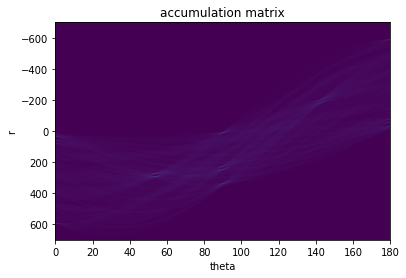

In [5]:

plt.imshow(acc_mat, extent=[0, 180, rmax, -rmax],aspect='auto')
plt.xlabel('theta')
plt.ylabel('r')
plt.title('accumulation matrix')
plt.show()

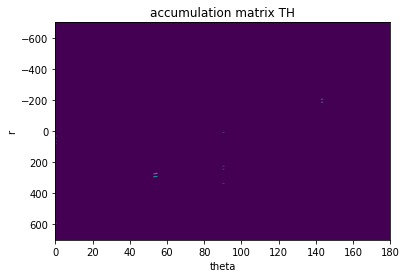

In [6]:
# threshold accumulation matrix
TH = 100
acc_mat_th = acc_mat > TH


plt.imshow(acc_mat_th, extent=[0, 180, rmax, -rmax],aspect='auto')
plt.xlabel('theta')
plt.ylabel('r')
plt.title('accumulation matrix TH')
plt.show()

(rho,theta): (-204.51628470637672, 143.0)
(rho,theta): (-203.51628470637672, 143.0)
(rho,theta): (-185.51628470637672, 143.0)
(rho,theta): (-184.51628470637672, 143.0)
(rho,theta): (8.483715293623277, 90.0)
(rho,theta): (32.48371529362328, 0.0)
(rho,theta): (59.48371529362328, 0.0)
(rho,theta): (78.48371529362328, 0.0)
(rho,theta): (225.48371529362328, 90.0)
(rho,theta): (244.48371529362328, 90.0)
(rho,theta): (270.4837152936233, 54.0)
(rho,theta): (271.4837152936233, 54.0)
(rho,theta): (272.4837152936233, 54.0)
(rho,theta): (273.4837152936233, 53.0)
(rho,theta): (273.4837152936233, 54.0)
(rho,theta): (274.4837152936233, 53.0)
(rho,theta): (275.4837152936233, 53.0)
(rho,theta): (290.4837152936233, 54.0)
(rho,theta): (291.4837152936233, 53.0)
(rho,theta): (291.4837152936233, 54.0)
(rho,theta): (292.4837152936233, 53.0)
(rho,theta): (292.4837152936233, 54.0)
(rho,theta): (293.4837152936233, 53.0)
(rho,theta): (294.4837152936233, 53.0)
(rho,theta): (336.4837152936233, 90.0)
(rho,theta): (

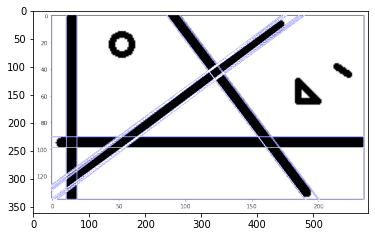

In [7]:
# mostrar las lineas
# get indices of acc_mat_th
edge_inds = np.argwhere(acc_mat_th > 0)

res = image.copy()
for r_ind, t_ind in edge_inds:
    rho = r_vec[r_ind]
    theta = t_vec[t_ind]

    print("(rho,theta): " + str((rho, theta/np.pi*180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)


plt.imshow(res)
plt.show()